In [109]:
import numpy as np
import pandas as pd 
from hdbscan import HDBSCAN
import umap
import seaborn as sns
import matplotlib.pyplot as plt
#import plotly.graph_objs as go
from sklearn.metrics import completeness_score, homogeneity_score, v_measure_score
from matplotlib.lines import Line2D

import string

# descion tree
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from six import StringIO  
from IPython.display import Image  
import pydotplus

# tsne
# from sklearn.manifold import TSNE

# random forest
from sklearn.ensemble import ExtraTreesClassifier

# colours
from matplotlib.colors import rgb2hex

# description of distance metrics here:
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html

plot_kwds = {'alpha' : 0.5, 's' : 80, 'linewidths':0}

DIR="/Users/sp16194/OneDrive - University of Bristol/projects/kinspace-systems/code/"

mcs = 10 # smallest cluster size
metric = 'jaccard'

colour_set_rgb = [[2,63,165],[125,135,185],[190,193,212],[214,188,192],[187,119,132],[142,6,59],[74,111,227],[133,149,225],[181,187,227],[230,175,185],[224,123,145],[211,63,106],[17,198,56],[141,213,147],[198,222,199],[234,211,198],[240,185,141],[239,151,8],[15,207,192],[156,222,214],[213,234,231],[243,225,235],[246,196,225],[247,156,212]]
        
colour_set = [[j / 255 for j in x] for x in colour_set_rgb]
colour_set = [ rgb2hex(i) for i in colour_set]

# Siblings


In [110]:
## read in the data
## these are within language distance matrices - not between language 
string_df = pd.read_csv(DIR+"data/matrix/siblings_matrix.csv") #

string_mat = string_df[string_df.columns[:-1]]
print(string_mat.shape)

 

 
# possible distance metrics
# ['euclidean', 'l2', 'l1', 'manhattan', 'cityblock', 'braycurtis', 'canberra', 'chebyshev', 
# 'correlation', 'cosine', 'dice', 'hamming', 'jaccard', 'kulsinski', 'mahalanobis', metric, 
# 'minkowski', 'rogerstanimoto', 'russellrao', 'seuclidean', 'sokalmichener', 'sokalsneath', 'sqeuclidean', 
# 'yule', 'wminkowski']

# what settings give the least outliers
settings=[]
for x in range(3, 11):  # check from 3 to 11. 3 is HDBSCAN minimum (below is single chain linking) 
                        # 11 was shown to decrease performance in simulations.
    clusterer = HDBSCAN(algorithm='best', alpha=1.0,
        approx_min_span_tree=True,
        gen_min_span_tree=True,
        leaf_size=100,
        metric=metric,
        min_cluster_size=mcs, # smallest size a cluster can be
        min_samples=x, # how conservative should clustering be (larger = more conservative)
                        # 7 gives the lowest number of outliers.
        p=None, 
        cluster_selection_method='eom')
    clusterer.fit(string_mat)
    cluster_count = list(np.unique(clusterer.labels_, return_counts=True))
    cluster_count = pd.DataFrame(np.transpose(cluster_count), columns = ['Group', 'Count'])
    print(x, cluster_count.iloc[0,1])
    settings.append([x, cluster_count.iloc[0,1]])

settings = pd.DataFrame(settings)
settings.columns = ['value', 'outliers']
settings = settings.loc[settings['outliers'].idxmin()]
ms = int(settings['value'])

(849, 28)
3 41
4 54
5 55
6 46
7 50
8 58
9 58
10 62


In [111]:
print(int(ms))

clusterer = HDBSCAN(algorithm='best', alpha=1.0,
    approx_min_span_tree=True,
    gen_min_span_tree=True,
    leaf_size=100,
    metric=metric,
    min_cluster_size=mcs, # smallest size a cluster can be
    min_samples=int(ms), # how conservative should clustering be (larger = more conservative)
    p=None, 
    cluster_selection_method='eom')
clusterer.fit(string_mat)

#clusterer.single_linkage_tree_.plot(cmap='viridis', colorbar=True)
cluster_count = list(np.unique(clusterer.labels_, return_counts=True))
cluster_count = pd.DataFrame(np.transpose(cluster_count), columns = ['Group', 'Count'])
cluster_count

3


,Group,Count
0,-1,41
1,0,16
2,1,50
3,2,230
4,3,29
5,4,93
6,5,13
7,6,86
8,7,10
9,8,50


In [112]:
# organise cluster output
output = pd.DataFrame(columns=['Glottocode','label_'])
output['Glottocode'] = string_df.Glottocode
output['label_'] = clusterer.labels_.tolist()
output['outlier_prob'] = clusterer.outlier_scores_.tolist()
output['cluster_prob'] = clusterer.probabilities_.tolist()

# ignore outliers
indices = output.label_ != -1 
output = output[indices]
strmat_subset = string_mat[indices]

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/hdbscan/hdbscan_.py:980: RuntimeWarning: invalid value encountered in double_scalars
  self._outlier_scores = outlier_scores(self._condensed_tree)


Accuracy: 0.9801980198019802
Feature ranking:
1. feature 26 (0.087369)
2. feature 20 (0.072235)
3. feature 9 (0.070254)
4. feature 17 (0.067707)
5. feature 4 (0.059708)
6. feature 8 (0.058904)
7. feature 1 (0.057704)
8. feature 13 (0.047260)
9. feature 23 (0.046562)
10. feature 0 (0.043168)
11. feature 27 (0.041129)
12. feature 22 (0.034735)
13. feature 14 (0.034049)
14. feature 12 (0.032577)
15. feature 19 (0.032541)
16. feature 5 (0.032193)
17. feature 15 (0.025098)
18. feature 11 (0.024778)
19. feature 18 (0.024011)
20. feature 6 (0.020144)
21. feature 21 (0.017745)
22. feature 16 (0.017551)
23. feature 3 (0.015361)
24. feature 10 (0.013600)
25. feature 7 (0.008420)
26. feature 2 (0.008383)
27. feature 24 (0.003586)
28. feature 25 (0.003227)


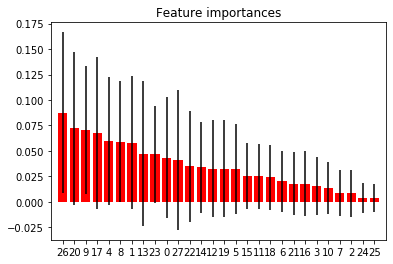

In [113]:
x_train, x_test, y_train, y_test = train_test_split(strmat_subset, output['label_'], test_size=0.25, random_state=1) # 75% training and 25% test

# Create Decision Tree classifer object
unique_groups = np.unique(clusterer.labels_)
clf = DecisionTreeClassifier(criterion="entropy", max_leaf_nodes = len(unique_groups)-1)

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


## random forest 
forest = ExtraTreesClassifier(n_estimators=1000,
                          random_state=0)

forest.fit(strmat_subset, output['label_'])
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
           axis=0)
indices = np.argsort(importances)[::-1]

feature_importance = pd.DataFrame(columns = ['feature', 'importance'])
feature_importance['feature'] = indices
feature_importance['importance'] = importances[indices]

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(string_mat.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(string_mat.shape[1]), indices)
plt.xlim([-1, string_mat.shape[1]])
#plt.show()

print("Feature ranking:")
for f in range(0, len(string_mat.columns)):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

In [114]:
# reorganise cluster output
output = pd.DataFrame(columns=['Glottocode','label_'])
output['Glottocode'] = string_df.Glottocode
output['label_'] = clusterer.labels_.tolist()
output['outlier_prob'] = clusterer.outlier_scores_.tolist()
output['cluster_prob'] = clusterer.probabilities_.tolist()

output.to_csv(DIR+'results/hdbscan/siblings.csv')

# remove uncategorised langauges from the decision tree
indices = output.label_ != -1 
output2 = output[indices]
# FI_mat2 = FI_mat[indices]
string_mat2 = string_mat[indices]

df = output2['label_'].value_counts().rename_axis('unique_values').reset_index(name='counts')
df['new_label'] = [chr(i+65) for i in range(df.shape[0])]

output2 = output2.merge(df, how='left', left_on=['label_'],right_on=['unique_values'])

x_train, x_test, y_train, y_test = train_test_split(string_mat2, output2['new_label'], test_size=0.25, random_state=1) # 75% training and 25% test

# Create Decision Tree classifer object
# unique_groups = np.unique(clusterer.labels_)
unique_groups = np.unique(output2['new_label'])
clf = DecisionTreeClassifier(criterion="entropy", max_leaf_nodes = len(unique_groups)-1)

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

## plot tree
# import graphviz
# from sklearn.tree import export_graphviz

# graphviz.Source(export_graphviz(clf))
# max_class = np.max(output2['new_label'])
# class_names = [str(x) for x in (range(0, max_class+1))]
class_names = unique_groups
print(class_names)
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = string_mat2.columns, class_names = class_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

graph.write_pdf(DIR+"results/decision-trees/siblings_letters.pdf") 

# Image(graph.create_png())

Accuracy: 0.9603960396039604
['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O']


True

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/umap/umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


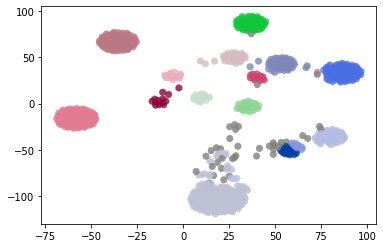

In [115]:
label = [clusterer.labels_]
color_palette = sns.color_palette('Paired', 47)
cluster_colors = [colour_set[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]

## legend creation
unique_groups = np.unique(clusterer.labels_)
unique_colours = [colour_set[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in unique_groups]

# custom_scatter = []
# for i in range(0, len(unique_groups)):
#     custom_scatter.append(Line2D([0], [0], marker='o', color=unique_colours[i], label=str(unique_groups[i]),
#                           markerfacecolor=unique_colours[i], markersize=10, lw=0))

reducer = umap.UMAP(
    n_neighbors=50, # low numbers emphasise local structure - high numbers global structure
    min_dist=8, # how tight are values clustered (low = tighter; high = looser)
    n_components=2, # number of dimensions to output
    random_state=42,  # set random seed
    spread = 10) #
embedding = reducer.fit_transform(string_mat)

fig, ax = plt.subplots()
ax.scatter(x = embedding[:,0], y = embedding[:,1], s=50, linewidth=0, c=cluster_colors, alpha=0.8) 
# ax.legend(handles=custom_scatter, loc='lower left', ncol = 3)
plt.show()

#np.savetxt(DIR+'results/umap/siblings_embeddings.csv', embedding, delimiter=",")

#fig.savefig(DIR+'results/umap/siblings.pdf', format='pdf')

# G1

In [116]:
## read in the data
## these are within language distance matrices - not between language 
string_df = pd.read_csv(DIR+"data/matrix/g1_matrix.csv") #

string_mat = string_df[string_df.columns[:-1]]
print(string_mat.shape) 

# possible distance metrics
# ['euclidean', 'l2', 'l1', 'manhattan', 'cityblock', 'braycurtis', 'canberra', 'chebyshev', 
# 'correlation', 'cosine', 'dice', 'hamming', 'jaccard', 'kulsinski', 'mahalanobis', metric, 
# 'minkowski', 'rogerstanimoto', 'russellrao', 'seuclidean', 'sokalmichener', 'sokalsneath', 'sqeuclidean', 
# 'yule', 'wminkowski']

# what settings give the least outliers
settings = []
for x in range(3, 12):  # check from 3 to 11. 3 is HDBSCAN minimum (below is single chain linking) 
                        # 11 was shown to decrease performance in simulations.
    clusterer = HDBSCAN(algorithm='best', alpha=1.0,
        approx_min_span_tree=True,
        gen_min_span_tree=True,
        leaf_size=100,
        metric=metric,
        min_cluster_size=mcs, # smallest size a cluster can be
        min_samples=x, # how conservative should clustering be (larger = more conservative)
                        # 7 gives the lowest number of outliers.
        p=None, 
        cluster_selection_method='eom')
    clusterer.fit(string_mat)
    cluster_count = list(np.unique(clusterer.labels_, return_counts=True))
    cluster_count = pd.DataFrame(np.transpose(cluster_count), columns = ['Group', 'Count'])
    print(x, cluster_count.iloc[0,1])
    settings.append([x, cluster_count.iloc[0,1]])

settings = pd.DataFrame(settings)
settings.columns = ['value', 'outliers']
settings = settings.loc[settings['outliers'].idxmin()]
ms = int(settings['value'])

(719, 45)
3 60
4 84
5 75
6 70
7 81
8 95
9 90
10 91
11 95


In [117]:
print(ms)

clusterer = HDBSCAN(algorithm='best', alpha=1.0,
    approx_min_span_tree=True,
    gen_min_span_tree=True,
    leaf_size=100,
    metric=metric,
    min_cluster_size=mcs, # smallest size a cluster can be
    min_samples=ms, # how conservative should clustering be (larger = more conservative)
    p=None, 
    cluster_selection_method='eom')
clusterer.fit(string_mat)

#clusterer.single_linkage_tree_.plot(cmap='viridis', colorbar=True)
cluster_count = list(np.unique(clusterer.labels_, return_counts=True))
cluster_count = pd.DataFrame(np.transpose(cluster_count), columns = ['Group', 'Count'])
cluster_count

3


,Group,Count
0,-1,60
1,0,11
2,1,17
3,2,10
4,3,17
5,4,33
6,5,31
7,6,43
8,7,151
9,8,169


In [118]:
# organise cluster output
output = pd.DataFrame(columns=['Glottocode','label_'])
output['Glottocode'] = string_df.Glottocode
output['label_'] = clusterer.labels_.tolist()
output['outlier_prob'] = clusterer.outlier_scores_.tolist()
output['cluster_prob'] = clusterer.probabilities_.tolist()

# ignore outliers
indices = output.label_ != -1 
output = output[indices]
strmat_subset = string_mat[indices]

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/hdbscan/hdbscan_.py:980: RuntimeWarning: invalid value encountered in double_scalars
  self._outlier_scores = outlier_scores(self._condensed_tree)


Accuracy: 0.9575757575757575
Feature ranking:
1. feature 0 (0.090577)
2. feature 36 (0.087393)
3. feature 38 (0.082343)
4. feature 2 (0.077600)
5. feature 43 (0.066097)
6. feature 26 (0.062293)
7. feature 15 (0.053600)
8. feature 28 (0.052143)
9. feature 32 (0.050216)
10. feature 23 (0.050152)
11. feature 34 (0.047563)
12. feature 13 (0.046676)
13. feature 21 (0.043925)
14. feature 10 (0.042026)
15. feature 30 (0.020005)
16. feature 19 (0.019572)
17. feature 9 (0.011200)
18. feature 5 (0.010901)
19. feature 11 (0.010043)
20. feature 18 (0.010021)
21. feature 7 (0.009804)
22. feature 17 (0.008924)
23. feature 24 (0.008351)
24. feature 40 (0.007082)
25. feature 20 (0.005132)
26. feature 22 (0.003307)
27. feature 39 (0.002993)
28. feature 31 (0.002924)
29. feature 14 (0.002685)
30. feature 33 (0.002596)
31. feature 29 (0.001953)
32. feature 42 (0.001744)
33. feature 41 (0.001519)
34. feature 44 (0.001388)
35. feature 27 (0.001342)
36. feature 16 (0.001104)
37. feature 1 (0.000742)
38. fea

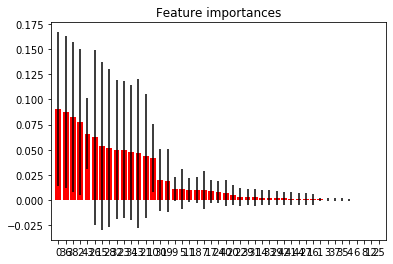

In [119]:
x_train, x_test, y_train, y_test = train_test_split(strmat_subset, output['label_'], test_size=0.25, random_state=1) # 75% training and 25% test

# Create Decision Tree classifer object
unique_groups = np.unique(clusterer.labels_)
clf = DecisionTreeClassifier(criterion="entropy", max_leaf_nodes = len(unique_groups)-1)

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


## random forest 
forest = ExtraTreesClassifier(n_estimators=1000,
                          random_state=0)

forest.fit(strmat_subset, output['label_'])
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
           axis=0)
indices = np.argsort(importances)[::-1]

feature_importance = pd.DataFrame(columns = ['feature', 'importance'])
feature_importance['feature'] = indices
feature_importance['importance'] = importances[indices]

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(string_mat.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(string_mat.shape[1]), indices)
plt.xlim([-1, string_mat.shape[1]])
#plt.show()

print("Feature ranking:")
for f in range(0, len(string_mat.columns)):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

So we have identified some key features from the initial cluster analysis that organise our space. Here we re-cluster the data using only these important features to determine how stable the space is, or is clustering on some noise

In [120]:
most_important = feature_importance.importance >= 0.02019

FI_mat = string_mat.iloc[:,feature_importance.feature[most_important]]
print(FI_mat.shape)

settings=[]
for x in range(3, 12):
    clusterer = HDBSCAN(algorithm='best', alpha=1.0,
        approx_min_span_tree=True,
        gen_min_span_tree=True,
        leaf_size=100,
        metric=metric,
        min_cluster_size=mcs, # smallest size a cluster can be
        min_samples=x, # how conservative should clustering be (larger = more conservative)
                        # 7 gives the lowest number of outliers.
        p=None, 
        cluster_selection_method='eom')
    clusterer.fit(FI_mat)
    cluster_count = list(np.unique(clusterer.labels_, return_counts=True))
    cluster_count = pd.DataFrame(np.transpose(cluster_count), columns = ['Group', 'Count'])
    print(x, cluster_count.iloc[0,1])
    settings.append([x, cluster_count.iloc[0,1]])

settings = pd.DataFrame(settings)
settings.columns = ['value', 'outliers']
settings = settings.loc[settings['outliers'].idxmin()]
ms = int(settings['value'])

(719, 14)
3 25
4 30
5 30
6 29
7 33
8 33
9 33
10 33
11 33


In [121]:
clusterer = HDBSCAN(algorithm='best', alpha=1.0,
    approx_min_span_tree=True,
    gen_min_span_tree=True,
    leaf_size=100,
    metric=metric,
    min_cluster_size=mcs, # smallest size a cluster can be
    min_samples=ms, # how conservative should clustering be (larger = more conservative) 
    p=None, 
    cluster_selection_method='eom')
clusterer.fit(FI_mat)

#clusterer.single_linkage_tree_.plot(cmap='viridis', colorbar=True)
cluster_count = list(np.unique(clusterer.labels_, return_counts=True))
cluster_count = pd.DataFrame(np.transpose(cluster_count), columns = ['Group', 'Count'])
cluster_count

,Group,Count
0,-1,25
1,0,61
2,1,14
3,2,144
4,3,16
5,4,31
6,5,20
7,6,121
8,7,26
9,8,33


In [122]:
# reorganise cluster output
output = pd.DataFrame(columns=['Glottocode','label_'])
output['Glottocode'] = string_df.Glottocode
output['label_'] = clusterer.labels_.tolist()
output['outlier_prob'] = clusterer.outlier_scores_.tolist()
output['cluster_prob'] = clusterer.probabilities_.tolist()

output.to_csv(DIR+'results/hdbscan/g1.csv')

# remove uncategorised langauges from the decision tree
indices = output.label_ != -1 
output2 = output[indices]
FI_mat2 = FI_mat[indices]

df = output2['label_'].value_counts().rename_axis('unique_values').reset_index(name='counts')
df['new_label'] = [chr(i+65) for i in range(df.shape[0])]

output2 = output2.merge(df, how='left', left_on=['label_'],right_on=['unique_values'])

x_train, x_test, y_train, y_test = train_test_split(FI_mat2, output2['new_label'], test_size=0.25, random_state=1) # 75% training and 25% test

# Create Decision Tree classifer object
# unique_groups = np.unique(clusterer.labels_)
unique_groups = np.unique(output2['new_label'])
clf = DecisionTreeClassifier(criterion="entropy", max_leaf_nodes = len(unique_groups)-1)

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

## plot tree
# import graphviz
# from sklearn.tree import export_graphviz

# graphviz.Source(export_graphviz(clf))
# max_class = np.max(output2['label_'])
# class_names = [str(x) for x in (range(0, max_class+1))]
class_names = unique_groups
print(class_names)
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = FI_mat2.columns, class_names = class_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

graph.write_pdf(DIR+"results/decision-trees/g1.pdf") 

#Image(graph.create_png())

Accuracy: 0.9540229885057471
['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L']


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/hdbscan/hdbscan_.py:980: RuntimeWarning: invalid value encountered in double_scalars
  self._outlier_scores = outlier_scores(self._condensed_tree)


True

In [123]:
label = [clusterer.labels_]
color_palette = sns.color_palette('Paired', 47)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]

## legend creation
unique_groups = np.unique(clusterer.labels_)
unique_colours = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in unique_groups]

custom_scatter = []
for i in range(0, len(unique_groups)):
    custom_scatter.append(Line2D([0], [0], marker='o', color=unique_colours[i], label=str(unique_groups[i]),
                          markerfacecolor=unique_colours[i], markersize=10, lw=0))

reducer = umap.UMAP(
    n_neighbors=50, # low numbers emphasise local structure - high numbers global structure
    min_dist=8, # how tight are values clustered (low = tighter; high = looser)
    n_components=2, # number of dimensions to output
    random_state=42,  # set random seed
    spread = 10) # set random seed
embedding = reducer.fit_transform(string_mat)

np.savetxt(DIR+'results/umap/g1_embeddings.csv', embedding, delimiter=",")

# fig, ax = plt.subplots()
# ax.scatter(x = embedding[:,0], y = embedding[:,1], s=50, linewidth=0, c=cluster_colors, alpha=0.8)
# ax.legend(handles=custom_scatter, loc='lower right', ncol = 3)
# plt.show()

# fig.savefig(DIR+'results/umap/g1.pdf', format='pdf')

# X_embedded = TSNE(n_components=2).fit_transform(string_mat)

# fig, ax = plt.subplots()
# ax.scatter(x = X_embedded[:,0], y = X_embedded[:,1], s=50, linewidth=0, c=cluster_colors, alpha=0.8)
# #plt.show()

# fig.savefig(DIR+'results/tsne/g1.pdf', format='pdf')

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/umap/umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


# G0

In [124]:
## read in the data
## these are within language distance matrices - not between language 
string_df = pd.read_csv(DIR+"data/matrix/g0_matrix.csv") #

string_mat = string_df[string_df.columns[:-1]]
print(string_mat.shape)

# possible distance metrics
# ['euclidean', 'l2', 'l1', 'manhattan', 'cityblock', 'braycurtis', 'canberra', 'chebyshev', 
# 'correlation', 'cosine', 'dice', 'hamming', 'jaccard', 'kulsinski', 'mahalanobis', metric, 
# 'minkowski', 'rogerstanimoto', 'russellrao', 'seuclidean', 'sokalmichener', 'sokalsneath', 'sqeuclidean', 
# 'yule', 'wminkowski']

# what settings give the least outliers
settings = []
for x in range(3, 12):  # check from 3 to 11. 3 is HDBSCAN minimum (below is single chain linking) 
                        # 11 was shown to decrease performance in simulations.
    clusterer = HDBSCAN(algorithm='best', alpha=1.0,
        approx_min_span_tree=True,
        gen_min_span_tree=False,
        leaf_size=100,
        metric=metric,
        min_cluster_size=mcs, # smallest size a cluster can be
        min_samples=x, # how conservative should clustering be (larger = more conservative)
                        # 7 gives the lowest number of outliers.
        p=None, 
        cluster_selection_method='eom')
    clusterer.fit(string_mat)
    cluster_count = list(np.unique(clusterer.labels_, return_counts=True))
    cluster_count = pd.DataFrame(np.transpose(cluster_count), columns = ['Group', 'Count'])
    print(x, cluster_count.iloc[0,1])
    settings.append([x, cluster_count.iloc[0,1]])
    
settings = pd.DataFrame(settings)
settings.columns = ['value', 'outliers']
settings = settings.loc[settings['outliers'].idxmin()]
ms = int(settings['value'])

(503, 780)
3 169
4 177
5 182
6 183
7 191
8 208
9 213
10 219
11 191


In [125]:
print(ms)

clusterer = HDBSCAN(algorithm='best', alpha=1.0,
    approx_min_span_tree=True,
    gen_min_span_tree=True,
    leaf_size=100,
    metric=metric,
    min_cluster_size=mcs, # smallest size a cluster can be
    min_samples=ms, # how conservative should clustering be (larger = more conservative)
    p=None, 
    cluster_selection_method='eom')
clusterer.fit(string_mat)

#clusterer.single_linkage_tree_.plot(cmap='viridis', colorbar=True)
cluster_count = list(np.unique(clusterer.labels_, return_counts=True))
cluster_count = pd.DataFrame(np.transpose(cluster_count), columns = ['Group', 'Count'])
cluster_count

3


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/hdbscan/hdbscan_.py:253: UserWarning: Cannot generate Minimum Spanning Tree; the implemented Prim's does not produce the full minimum spanning tree 
  warn('Cannot generate Minimum Spanning Tree; '


,Group,Count
0,-1,169
1,0,17
2,1,11
3,2,19
4,3,28
5,4,12
6,5,25
7,6,13
8,7,35
9,8,20


In [126]:
# organise cluster output
output = pd.DataFrame(columns=['Glottocode','label_'])
output['Glottocode'] = string_df.Glottocode
output['label_'] = clusterer.labels_.tolist()
output['outlier_prob'] = clusterer.outlier_scores_.tolist()
output['cluster_prob'] = clusterer.probabilities_.tolist()

# ignore outliers
indices = output.label_ != -1 
output = output[indices]
strmat_subset = string_mat[indices]

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/hdbscan/hdbscan_.py:980: RuntimeWarning: invalid value encountered in double_scalars
  self._outlier_scores = outlier_scores(self._condensed_tree)


Accuracy: 0.9523809523809523
Feature ranking:
1. feature 0 (0.025067)
2. feature 549 (0.022455)
3. feature 626 (0.022395)
4. feature 590 (0.022268)
5. feature 779 (0.022149)
6. feature 588 (0.022013)
7. feature 57 (0.021495)
8. feature 17 (0.021269)
9. feature 56 (0.021082)
10. feature 569 (0.021050)
11. feature 37 (0.020522)
12. feature 76 (0.020473)
13. feature 571 (0.019673)
14. feature 20 (0.019330)
15. feature 550 (0.019160)
16. feature 607 (0.017509)
17. feature 19 (0.010903)
18. feature 589 (0.009270)
19. feature 55 (0.009097)
20. feature 18 (0.008917)
21. feature 570 (0.008484)
22. feature 568 (0.008156)
23. feature 75 (0.007685)
24. feature 58 (0.007579)
25. feature 551 (0.006966)
26. feature 38 (0.006650)
27. feature 625 (0.006505)
28. feature 770 (0.006150)
29. feature 133 (0.006109)
30. feature 608 (0.005669)
31. feature 767 (0.005594)
32. feature 169 (0.005560)
33. feature 96 (0.005402)
34. feature 480 (0.005388)
35. feature 204 (0.005302)
36. feature 474 (0.005260)
37. fe

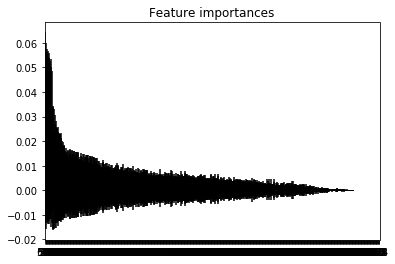

In [127]:
x_train, x_test, y_train, y_test = train_test_split(strmat_subset, output['label_'], test_size=0.25, random_state=1) # 75% training and 25% test

# Create Decision Tree classifer object
unique_groups = np.unique(clusterer.labels_)
clf = DecisionTreeClassifier(criterion="entropy", max_leaf_nodes = len(unique_groups)-1)

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


## random forest 
forest = ExtraTreesClassifier(n_estimators=1000,
                          random_state=0)

forest.fit(strmat_subset, output['label_'])
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
           axis=0)
indices = np.argsort(importances)[::-1]

feature_importance = pd.DataFrame(columns = ['feature', 'importance'])
feature_importance['feature'] = indices
feature_importance['importance'] = importances[indices]

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(string_mat.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(string_mat.shape[1]), indices)
plt.xlim([-1, string_mat.shape[1]])
#plt.show()

print("Feature ranking:")
for f in range(0, len(string_mat.columns)):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

So we have identified some key features from the initial cluster analysis that organise our space. Here we re-cluster the data using only these important features to determine how stable the space is, or is clustering on some noise

In [128]:
most_important = feature_importance.importance >= 0.00196

FI_mat = string_mat.iloc[:,feature_importance.feature[most_important]]
print(FI_mat.shape)

settings=[]
for x in range(3, 12):
    clusterer = HDBSCAN(algorithm='best', alpha=1.0,
        approx_min_span_tree=True,
        gen_min_span_tree=True,
        leaf_size=100,
        metric=metric,
        min_cluster_size=mcs, # smallest size a cluster can be
        min_samples=x, # how conservative should clustering be (larger = more conservative)
                        # 7 gives the lowest number of outliers.
        p=None, 
        cluster_selection_method='eom')
    clusterer.fit(FI_mat)
    cluster_count = list(np.unique(clusterer.labels_, return_counts=True))
    cluster_count = pd.DataFrame(np.transpose(cluster_count), columns = ['Group', 'Count'])
    print(x, cluster_count.iloc[0,1])
    settings.append([x, cluster_count.iloc[0,1]])

settings = pd.DataFrame(settings)
settings.columns = ['value', 'outliers']
settings = settings.loc[settings['outliers'].idxmin()]
ms = int(settings['value'])

(503, 100)
3 110
4 107
5 121
6 119


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/hdbscan/hdbscan_.py:253: UserWarning: Cannot generate Minimum Spanning Tree; the implemented Prim's does not produce the full minimum spanning tree 
  warn('Cannot generate Minimum Spanning Tree; '
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/hdbscan/hdbscan_.py:253: UserWarning: Cannot generate Minimum Spanning Tree; the implemented Prim's does not produce the full minimum spanning tree 
  warn('Cannot generate Minimum Spanning Tree; '
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/hdbscan/hdbscan_.py:253: UserWarning: Cannot generate Minimum Spanning Tree; the implemented Prim's does not produce the full minimum spanning tree 
  warn('Cannot generate Minimum Spanning Tree; '
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/hdbscan/hdbscan_.py:253: UserWarning: Cannot generate Minimum Spanning Tree; the implemented P

7 131
8 128
9 134
10 136
11 145


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/hdbscan/hdbscan_.py:253: UserWarning: Cannot generate Minimum Spanning Tree; the implemented Prim's does not produce the full minimum spanning tree 
  warn('Cannot generate Minimum Spanning Tree; '
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/hdbscan/hdbscan_.py:253: UserWarning: Cannot generate Minimum Spanning Tree; the implemented Prim's does not produce the full minimum spanning tree 
  warn('Cannot generate Minimum Spanning Tree; '
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/hdbscan/hdbscan_.py:253: UserWarning: Cannot generate Minimum Spanning Tree; the implemented Prim's does not produce the full minimum spanning tree 
  warn('Cannot generate Minimum Spanning Tree; '
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/hdbscan/hdbscan_.py:253: UserWarning: Cannot generate Minimum Spanning Tree; the implemented P

In [129]:
print(ms)

clusterer = HDBSCAN(algorithm='best', alpha=1.0,
    approx_min_span_tree=True,
    gen_min_span_tree=True,
    leaf_size=100,
    metric=metric,
    min_cluster_size=10, # smallest size a cluster can be
    min_samples=ms, # how conservative should clustering be (larger = more conservative) 
    p=None, 
    cluster_selection_method='eom')
clusterer.fit(FI_mat)

#clusterer.single_linkage_tree_.plot(cmap='viridis', colorbar=True)
cluster_count = list(np.unique(clusterer.labels_, return_counts=True))
cluster_count = pd.DataFrame(np.transpose(cluster_count), columns = ['Group', 'Count'])
cluster_count

4


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/hdbscan/hdbscan_.py:253: UserWarning: Cannot generate Minimum Spanning Tree; the implemented Prim's does not produce the full minimum spanning tree 
  warn('Cannot generate Minimum Spanning Tree; '


,Group,Count
0,-1,107
1,0,31
2,1,10
3,2,26
4,3,21
5,4,32
6,5,31
7,6,16
8,7,31
9,8,15


In [130]:
# reorganise cluster output
output = pd.DataFrame(columns=['Glottocode','label_'])
output['Glottocode'] = string_df.Glottocode
output['label_'] = clusterer.labels_.tolist()
output['outlier_prob'] = clusterer.outlier_scores_.tolist()
output['cluster_prob'] = clusterer.probabilities_.tolist()

output.to_csv(DIR+'results/hdbscan/g0.csv')

# remove uncategorised langauges from the decision tree
indices = output.label_ != -1 
output2 = output[indices]
FI_mat2 = FI_mat[indices]

df = output2['label_'].value_counts().rename_axis('unique_values').reset_index(name='counts')
df['new_label'] = [chr(i+65) for i in range(df.shape[0])]

output2 = output2.merge(df, how='left', left_on=['label_'],right_on=['unique_values'])


x_train, x_test, y_train, y_test = train_test_split(FI_mat2, output2['new_label'], test_size=0.25, random_state=1) # 75% training and 25% test

# Create Decision Tree classifer object
# unique_groups = np.unique(clusterer.labels_)
unique_groups = np.unique(output2['new_label'])
clf = DecisionTreeClassifier(criterion="entropy", max_leaf_nodes = len(unique_groups)-1)

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

## plot tree
# import graphviz
# from sklearn.tree import export_graphviz

# graphviz.Source(export_graphviz(clf))
# max_class = np.max(output2['label_'])
# class_names = [str(x) for x in (range(0, max_class+1))]
class_names = unique_groups
print(class_names)
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = FI_mat2.columns, class_names = class_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

graph.write_pdf(DIR+"results/decision-trees/g0.pdf") 

#Image(graph.create_png())

Accuracy: 0.9090909090909091
['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P']


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/hdbscan/hdbscan_.py:980: RuntimeWarning: invalid value encountered in double_scalars
  self._outlier_scores = outlier_scores(self._condensed_tree)


True

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/umap/umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


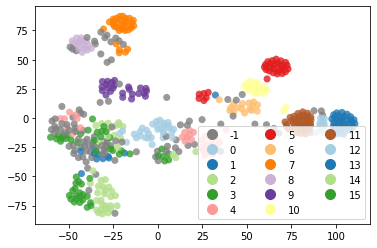

In [131]:
label = [clusterer.labels_]
color_palette = sns.color_palette('Paired', 47)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]

## legend creation
unique_groups = np.unique(clusterer.labels_)
unique_colours = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in unique_groups]

custom_scatter = []
for i in range(0, len(unique_groups)):
    custom_scatter.append(Line2D([0], [0], marker='o', color=unique_colours[i], label=str(unique_groups[i]),
                          markerfacecolor=unique_colours[i], markersize=10, lw=0))

reducer = umap.UMAP(
    n_neighbors=50, # low numbers emphasise local structure - high numbers global structure
    min_dist=8, # how tight are values clustered (low = tighter; high = looser)
    n_components=2, # number of dimensions to output
    random_state=42,  # set random seed
    spread = 10)
embedding = reducer.fit_transform(string_mat)

fig, ax = plt.subplots()
jittered_y = embedding[:,1] + 0.2 * np.random.rand(len(embedding[:,1])) -0.05
jittered_x = embedding[:,0] + 0.2 * np.random.rand(len(embedding[:,0])) -0.05
ax.scatter(x = jittered_x, y = jittered_y, s=50, linewidth=0, c=cluster_colors, alpha=0.8)
ax.legend(handles=custom_scatter, loc='lower right', ncol = 3)
plt.show()

#fig.savefig(DIR+'results/umap/g0.pdf', format='pdf')

# save embeddings
np.savetxt(DIR+'results/umap/g0_embeddings.csv', embedding, delimiter=",")

# X_embedded = TSNE(n_components=2).fit_transform(string_mat)

# fig, ax = plt.subplots()
# ax.scatter(x = X_embedded[:,0], y = X_embedded[:,1], s=50, linewidth=0, c=cluster_colors, alpha=0.8)
# #plt.show()

# fig.savefig(DIR+'results/tsne/g0.pdf', format='pdf')

# G+2

In [132]:
## read in the data
## these are within language distance matrices - not between language 
string_df = pd.read_csv(DIR+"data/matrix/g2_matrix.csv") #

string_mat = string_df[string_df.columns[:-1]]
print(string_mat.shape)

# possible distance metrics
# ['euclidean', 'l2', 'l1', 'manhattan', 'cityblock', 'braycurtis', 'canberra', 'chebyshev', 
# 'correlation', 'cosine', 'dice', 'hamming', 'jaccard', 'kulsinski', 'mahalanobis', metric, 
# 'minkowski', 'rogerstanimoto', 'russellrao', 'seuclidean', 'sokalmichener', 'sokalsneath', 'sqeuclidean', 
# 'yule', 'wminkowski']

# what settings give the least outliers
settings = []
for x in range(3, 12):  # check from 3 to 11. 3 is HDBSCAN minimum (below is single chain linking) 
                        # 11 was shown to decrease performance in simulations.
    clusterer = HDBSCAN(algorithm='best', alpha=1.0,
        approx_min_span_tree=True,
        gen_min_span_tree=False,
        leaf_size=100,
        metric=metric,
        min_cluster_size=mcs, # smallest size a cluster can be
        min_samples=x, # how conservative should clustering be (larger = more conservative)
                        # 7 gives the lowest number of outliers.
        p=None, 
        cluster_selection_method='eom')
    clusterer.fit(string_mat)
    cluster_count = list(np.unique(clusterer.labels_, return_counts=True))
    cluster_count = pd.DataFrame(np.transpose(cluster_count), columns = ['Group', 'Count'])
    print(x, cluster_count.iloc[0,1])
    settings.append([x, cluster_count.iloc[0,1]])
    
settings = pd.DataFrame(settings)
settings.columns = ['value', 'outliers']
settings = settings.loc[settings['outliers'].idxmin()]
ms = int(settings['value'])

(866, 6)
3 105
4 105
5 105
6 105
7 105
8 14
9 14
10 14
11 14


In [133]:
print(ms)

clusterer = HDBSCAN(algorithm='best', alpha=1.0,
    approx_min_span_tree=True,
    gen_min_span_tree=True,
    leaf_size=100,
    metric=metric,
    min_cluster_size=mcs, # smallest size a cluster can be
    min_samples=ms, # how conservative should clustering be (larger = more conservative)
    p=None, 
    cluster_selection_method='eom')
clusterer.fit(string_mat)

#clusterer.single_linkage_tree_.plot(cmap='viridis', colorbar=True)
cluster_count = list(np.unique(clusterer.labels_, return_counts=True))
cluster_count = pd.DataFrame(np.transpose(cluster_count), columns = ['Group', 'Count'])
cluster_count

8


,Group,Count
0,-1,14
1,0,105
2,1,11
3,2,466
4,3,23
5,4,14
6,5,233


In [134]:
# organise cluster output
output = pd.DataFrame(columns=['Glottocode','label_'])
output['Glottocode'] = string_df.Glottocode
output['label_'] = clusterer.labels_.tolist()
output['outlier_prob'] = clusterer.outlier_scores_.tolist()
output['cluster_prob'] = clusterer.probabilities_.tolist()

# ignore outliers
indices = output.label_ != -1 
output = output[indices]
strmat_subset = string_mat[indices]

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/hdbscan/hdbscan_.py:980: RuntimeWarning: invalid value encountered in double_scalars
  self._outlier_scores = outlier_scores(self._condensed_tree)


Accuracy: 0.9953051643192489
Feature ranking:
1. feature 1 (0.237556)
2. feature 4 (0.195866)
3. feature 3 (0.193744)
4. feature 0 (0.140461)
5. feature 5 (0.122653)
6. feature 2 (0.109719)


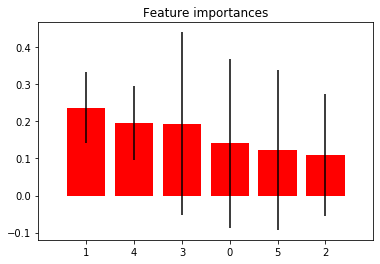

In [135]:
x_train, x_test, y_train, y_test = train_test_split(strmat_subset, output['label_'], test_size=0.25, random_state=1) # 75% training and 25% test

# Create Decision Tree classifer object
unique_groups = np.unique(clusterer.labels_)
clf = DecisionTreeClassifier(criterion="entropy", max_leaf_nodes = len(unique_groups)-1)

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


## random forest 
forest = ExtraTreesClassifier(n_estimators=1000,
                          random_state=0)

forest.fit(strmat_subset, output['label_'])
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
           axis=0)
indices = np.argsort(importances)[::-1]

feature_importance = pd.DataFrame(columns = ['feature', 'importance'])
feature_importance['feature'] = indices
feature_importance['importance'] = importances[indices]

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(string_mat.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(string_mat.shape[1]), indices)
plt.xlim([-1, string_mat.shape[1]])
#plt.show()

print("Feature ranking:")
for f in range(0, len(string_mat.columns)):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

So we have identified some key features from the initial cluster analysis that organise our space. Here we re-cluster the data using only these important features to determine how stable the space is, or is clustering on some noise

In [137]:
# reorganise cluster output
output = pd.DataFrame(columns=['Glottocode','label_'])
output['Glottocode'] = string_df.Glottocode
output['label_'] = clusterer.labels_.tolist()
output['outlier_prob'] = clusterer.outlier_scores_.tolist()
output['cluster_prob'] = clusterer.probabilities_.tolist()

output.to_csv(DIR+'results/hdbscan/g2.csv')

# remove uncategorised langauges from the decision tree
indices = output.label_ != -1 
output2 = output[indices]
string_mat2 = string_mat[indices]

df = output2['label_'].value_counts().rename_axis('unique_values').reset_index(name='counts')
df['new_label'] = [chr(i+65) for i in range(df.shape[0])]

output2 = output2.merge(df, how='left', left_on=['label_'],right_on=['unique_values'])


x_train, x_test, y_train, y_test = train_test_split(string_mat2, output2['new_label'], test_size=0.25, random_state=1) # 75% training and 25% test

# Create Decision Tree classifer object
# unique_groups = np.unique(clusterer.labels_)
unique_groups = np.unique(output2['new_label'])
clf = DecisionTreeClassifier(criterion="entropy", max_leaf_nodes = len(unique_groups)-1)

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

## plot tree
# import graphviz
# from sklearn.tree import export_graphviz

# graphviz.Source(export_graphviz(clf))
# max_class = np.max(output2['label_'])
# class_names = [str(x) for x in (range(0, max_class+1))]
class_names = unique_groups
print(class_names)
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = string_mat2.columns, class_names = class_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

graph.write_pdf(DIR+"results/decision-trees/g2.pdf") 

##Image(graph.create_png())

Accuracy: 0.971830985915493
['A' 'B' 'C' 'D' 'E' 'F']


True

In [ ]:
label = [clusterer.labels_]
color_palette = sns.color_palette('Paired', 47)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]

## legend creation
unique_groups = np.unique(clusterer.labels_)
unique_colours = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in unique_groups]

custom_scatter = []
for i in range(0, len(unique_groups)):
    custom_scatter.append(Line2D([0], [0], marker='o', color=unique_colours[i], label=str(unique_groups[i]),
                          markerfacecolor=unique_colours[i], markersize=10, lw=0))

reducer = umap.UMAP(
    n_neighbors=50, # low numbers emphasise local structure - high numbers global structure
    min_dist=8, # how tight are values clustered (low = tighter; high = looser)
    n_components=2, # number of dimensions to output
    random_state=42,  # set random seed
    spread = 10) # set random seed
embedding = reducer.fit_transform(string_mat)

np.savetxt(DIR+'results/umap/g2_embeddings.csv', embedding, delimiter=",")

# fig, ax = plt.subplots()
# ax.scatter(x = embedding[:,0], y = embedding[:,1], s=50, linewidth=0, c=cluster_colors, alpha=0.8)
# ax.legend(handles=custom_scatter, loc='upper left', ncol = 3)
# plt.show()

# fig.savefig(DIR+'results/umap/g2.pdf', format='pdf')

# X_embedded = TSNE(n_components=2).fit_transform(string_mat)

# fig, ax = plt.subplots()
# ax.scatter(x = X_embedded[:,0], y = X_embedded[:,1], s=50, linewidth=0, c=cluster_colors, alpha=0.8)
# #plt.show()

# fig.savefig(DIR+'results/tsne/g2.pdf', format='pdf')


# G-1

In [138]:
## read in the data
## these are within language distance matrices - not between language 
string_df = pd.read_csv(DIR+"data/matrix/niblings_matrix.csv") #

string_mat = string_df[string_df.columns[:-1]]
print(string_mat.shape)

# possible distance metrics
# ['euclidean', 'l2', 'l1', 'manhattan', 'cityblock', 'braycurtis', 'canberra', 'chebyshev', 
# 'correlation', 'cosine', 'dice', 'hamming', 'jaccard', 'kulsinski', 'mahalanobis', metric, 
# 'minkowski', 'rogerstanimoto', 'russellrao', 'seuclidean', 'sokalmichener', 'sokalsneath', 'sqeuclidean', 
# 'yule', 'wminkowski']

# what settings give the least outliers
settings = []
for x in range(3, 12):  # check from 3 to 11. 3 is HDBSCAN minimum (below is single chain linking) 
                        # 11 was shown to decrease performance in simulations.
    clusterer = HDBSCAN(algorithm='best', alpha=1.0,
        approx_min_span_tree=True,
        gen_min_span_tree=False,
        leaf_size=100,
        metric=metric,
        min_cluster_size=10, # smallest size a cluster can be
        min_samples=x, # how conservative should clustering be (larger = more conservative)
                        # 7 gives the lowest number of outliers.
        p=None, 
        cluster_selection_method='eom')
    clusterer.fit(string_mat)
    cluster_count = list(np.unique(clusterer.labels_, return_counts=True))
    cluster_count = pd.DataFrame(np.transpose(cluster_count), columns = ['Group', 'Count'])
    print(x, cluster_count.iloc[0,1])
    settings.append([x, cluster_count.iloc[0,1]])
    
settings = pd.DataFrame(settings)
settings.columns = ['value', 'outliers']
settings = settings.loc[settings['outliers'].idxmin()]
ms = int(settings['value'])

(600, 190)
3 123
4 129
5 140
6 142
7 153
8 167
9 186
10 179
11 140


In [139]:
print(ms)

clusterer = HDBSCAN(algorithm='best', alpha=1.0,
    approx_min_span_tree=True,
    gen_min_span_tree=True,
    leaf_size=100,
    metric=metric,
    min_cluster_size=mcs, # smallest size a cluster can be
    min_samples=ms, # how conservative should clustering be (larger = more conservative)
    p=None, 
    cluster_selection_method='eom')
clusterer.fit(string_mat)

#clusterer.single_linkage_tree_.plot(cmap='viridis', colorbar=True)
cluster_count = list(np.unique(clusterer.labels_, return_counts=True))
cluster_count = pd.DataFrame(np.transpose(cluster_count), columns = ['Group', 'Count'])
cluster_count

3


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/hdbscan/hdbscan_.py:253: UserWarning: Cannot generate Minimum Spanning Tree; the implemented Prim's does not produce the full minimum spanning tree 
  warn('Cannot generate Minimum Spanning Tree; '


,Group,Count
0,-1,123
1,0,12
2,1,34
3,2,18
4,3,21
5,4,29
6,5,22
7,6,102
8,7,13
9,8,72


In [140]:
# organise cluster output
output = pd.DataFrame(columns=['Glottocode','label_'])
output['Glottocode'] = string_df.Glottocode
output['label_'] = clusterer.labels_.tolist()
output['outlier_prob'] = clusterer.outlier_scores_.tolist()
output['cluster_prob'] = clusterer.probabilities_.tolist()

# ignore outliers
indices = output.label_ != -1 
output = output[indices]
strmat_subset = string_mat[indices]

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/hdbscan/hdbscan_.py:980: RuntimeWarning: invalid value encountered in double_scalars
  self._outlier_scores = outlier_scores(self._condensed_tree)


Accuracy: 0.9583333333333334
Feature ranking:
1. feature 89 (0.042573)
2. feature 14 (0.041840)
3. feature 4 (0.041408)
4. feature 149 (0.039990)
5. feature 145 (0.010506)
6. feature 171 (0.010389)
7. feature 10 (0.009816)
8. feature 27 (0.009754)
9. feature 86 (0.009611)
10. feature 160 (0.009564)
11. feature 96 (0.009454)
12. feature 102 (0.009230)
13. feature 0 (0.009217)
14. feature 185 (0.009142)
15. feature 5 (0.009126)
16. feature 155 (0.009036)
17. feature 91 (0.008939)
18. feature 39 (0.008847)
19. feature 150 (0.008702)
20. feature 15 (0.008685)
21. feature 49 (0.008544)
22. feature 110 (0.008530)
23. feature 172 (0.008293)
24. feature 161 (0.008187)
25. feature 119 (0.008165)
26. feature 181 (0.007950)
27. feature 176 (0.007691)
28. feature 163 (0.007598)
29. feature 35 (0.007532)
30. feature 105 (0.007513)
31. feature 164 (0.007446)
32. feature 156 (0.007442)
33. feature 113 (0.007429)
34. feature 68 (0.007242)
35. feature 186 (0.007232)
36. feature 168 (0.007198)
37. featu

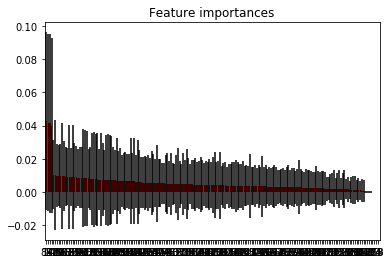

In [141]:
x_train, x_test, y_train, y_test = train_test_split(strmat_subset, output['label_'], test_size=0.20, random_state=1) # 75% training and 25% test

# Create Decision Tree classifer object
unique_groups = np.unique(clusterer.labels_)
clf = DecisionTreeClassifier(criterion="entropy", max_leaf_nodes = len(unique_groups)-1)

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


## random forest 
forest = ExtraTreesClassifier(n_estimators=1000,
                          random_state=0)

forest.fit(strmat_subset, output['label_'])
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
           axis=0)
indices = np.argsort(importances)[::-1]

feature_importance = pd.DataFrame(columns = ['feature', 'importance'])
feature_importance['feature'] = indices
feature_importance['importance'] = importances[indices]

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(string_mat.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(string_mat.shape[1]), indices)
plt.xlim([-1, string_mat.shape[1]])
#plt.show()

print("Feature ranking:")
for f in range(0, len(string_mat.columns)):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

In [142]:
most_important = feature_importance.importance >= 0.004029

FI_mat = string_mat.iloc[:,feature_importance.feature[most_important]]
print(FI_mat.shape)

settings=[]
for x in range(3, 12):
    clusterer = HDBSCAN(algorithm='best', alpha=1.0,
        approx_min_span_tree=True,
        gen_min_span_tree=True,
        leaf_size=100,
        metric=metric,
        min_cluster_size=mcs, # smallest size a cluster can be
        min_samples=x, # how conservative should clustering be (larger = more conservative)
                        # 7 gives the lowest number of outliers.
        p=None, 
        cluster_selection_method='eom')
    clusterer.fit(FI_mat)
    cluster_count = list(np.unique(clusterer.labels_, return_counts=True))
    cluster_count = pd.DataFrame(np.transpose(cluster_count), columns = ['Group', 'Count'])
    print(x, cluster_count.iloc[0,1])
    settings.append([x, cluster_count.iloc[0,1]])

settings = pd.DataFrame(settings)
settings.columns = ['value', 'outliers']
settings = settings.loc[settings['outliers'].idxmin()]
ms = int(settings['value'])

(600, 99)
3 117
4 131
5 136


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/hdbscan/hdbscan_.py:253: UserWarning: Cannot generate Minimum Spanning Tree; the implemented Prim's does not produce the full minimum spanning tree 
  warn('Cannot generate Minimum Spanning Tree; '
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/hdbscan/hdbscan_.py:253: UserWarning: Cannot generate Minimum Spanning Tree; the implemented Prim's does not produce the full minimum spanning tree 
  warn('Cannot generate Minimum Spanning Tree; '
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/hdbscan/hdbscan_.py:253: UserWarning: Cannot generate Minimum Spanning Tree; the implemented Prim's does not produce the full minimum spanning tree 
  warn('Cannot generate Minimum Spanning Tree; '
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/hdbscan/hdbscan_.py:253: UserWarning: Cannot generate Minimum Spanning Tree; the implemented P

6 137
7 140
8 141


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/hdbscan/hdbscan_.py:253: UserWarning: Cannot generate Minimum Spanning Tree; the implemented Prim's does not produce the full minimum spanning tree 
  warn('Cannot generate Minimum Spanning Tree; '
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/hdbscan/hdbscan_.py:253: UserWarning: Cannot generate Minimum Spanning Tree; the implemented Prim's does not produce the full minimum spanning tree 
  warn('Cannot generate Minimum Spanning Tree; '
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/hdbscan/hdbscan_.py:253: UserWarning: Cannot generate Minimum Spanning Tree; the implemented Prim's does not produce the full minimum spanning tree 
  warn('Cannot generate Minimum Spanning Tree; '


9 142
10 144
11 157


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/hdbscan/hdbscan_.py:253: UserWarning: Cannot generate Minimum Spanning Tree; the implemented Prim's does not produce the full minimum spanning tree 
  warn('Cannot generate Minimum Spanning Tree; '
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/hdbscan/hdbscan_.py:253: UserWarning: Cannot generate Minimum Spanning Tree; the implemented Prim's does not produce the full minimum spanning tree 
  warn('Cannot generate Minimum Spanning Tree; '


In [143]:
print(ms)

clusterer = HDBSCAN(algorithm='best', alpha=1.0,
    approx_min_span_tree=True,
    gen_min_span_tree=True,
    leaf_size=100,
    metric=metric,
    min_cluster_size=10, # smallest size a cluster can be
    min_samples=ms, # how conservative should clustering be (larger = more conservative) 
    p=None, 
    cluster_selection_method='eom')
clusterer.fit(FI_mat)

#clusterer.single_linkage_tree_.plot(cmap='viridis', colorbar=True)
cluster_count = list(np.unique(clusterer.labels_, return_counts=True))
cluster_count = pd.DataFrame(np.transpose(cluster_count), columns = ['Group', 'Count'])
cluster_count

3


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/hdbscan/hdbscan_.py:253: UserWarning: Cannot generate Minimum Spanning Tree; the implemented Prim's does not produce the full minimum spanning tree 
  warn('Cannot generate Minimum Spanning Tree; '


,Group,Count
0,-1,117
1,0,43
2,1,14
3,2,40
4,3,16
5,4,16
6,5,11
7,6,19
8,7,21
9,8,10


So we have identified some key features from the initial cluster analysis that organise our space. Here we re-cluster the data using only these important features to determine how stable the space is, or is clustering on some noise

In [149]:
# reorganise cluster output
output = pd.DataFrame(columns=['Glottocode','label_'])
output['Glottocode'] = string_df.Glottocode
output['label_'] = clusterer.labels_.tolist()
output['outlier_prob'] = clusterer.outlier_scores_.tolist()
output['cluster_prob'] = clusterer.probabilities_.tolist()

output.to_csv(DIR+'results/hdbscan/niblings.csv')

# remove uncategorised langauges from the decision tree
indices = output.label_ != -1 
output2 = output[indices]
string_mat2 = string_mat[indices]

df = output2['label_'].value_counts().rename_axis('unique_values').reset_index(name='counts')
df['new_label'] = [chr(i+65) for i in range(df.shape[0])]

output2 = output2.merge(df, how='left', left_on=['label_'],right_on=['unique_values'])

x_train, x_test, y_train, y_test = train_test_split(string_mat2, output2['new_label'], test_size=0.20, random_state=1) # 75% training and 25% test

# Create Decision Tree classifer object
# unique_groups = np.unique(clusterer.labels_)
unique_groups = np.unique(output2['new_label'])
clf = DecisionTreeClassifier(criterion="entropy", max_leaf_nodes = len(unique_groups)-1)

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

## plot tree
# import graphviz
# from sklearn.tree import export_graphviz

# graphviz.Source(export_graphviz(clf))
# max_class = np.max(output2['label_'])
# class_names = [str(x) for x in (range(0, max_class+1))]
class_names = unique_groups
print(class_names)
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = string_mat2.columns, class_names = class_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

graph.write_pdf(DIR+"results/decision-trees/niblings.pdf") 

#Image(graph.create_png())

Accuracy: 0.9896907216494846
['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P']


True

In [ ]:
label = [clusterer.labels_]
color_palette = sns.color_palette('Paired', 47)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]

## legend creation
unique_groups = np.unique(clusterer.labels_)
unique_colours = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in unique_groups]

custom_scatter = []
for i in range(0, len(unique_groups)):
    custom_scatter.append(Line2D([0], [0], marker='o', color=unique_colours[i], label=str(unique_groups[i]),
                          markerfacecolor=unique_colours[i], markersize=10, lw=0))

reducer = umap.UMAP(
    n_neighbors=50, # low numbers emphasise local structure - high numbers global structure
    min_dist=8, # how tight are values clustered (low = tighter; high = looser)
    n_components=2, # number of dimensions to output
    random_state=42,  # set random seed
    spread = 10) # set random seed
embedding = reducer.fit_transform(string_mat)

np.savetxt(DIR+'results/umap/niblings_embeddings.csv', embedding, delimiter=",")

fig, ax = plt.subplots()
ax.scatter(x = embedding[:,0], y = embedding[:,1], s=50, linewidth=0, c=cluster_colors, alpha=0.8)
ax.legend(handles=custom_scatter, loc='upper right', ncol = 3)
# plt.show()

# fig.savefig(DIR+'results/umap/niblings.pdf', format='pdf')

# X_embedded = TSNE(n_components=2).fit_transform(string_mat)

# fig, ax = plt.subplots()
# ax.scatter(x = X_embedded[:,0], y = X_embedded[:,1], s=50, linewidth=0, c=cluster_colors, alpha=0.8)
# #plt.show()

# fig.savefig(DIR+'results/tsne/niblings.pdf', format='pdf')
